# EDA Python Project on London Housing Dataset

## by Nishant Gupta

1) The timeline of this housing dataset is 1995 to 2020.

2) The dataset is downloaded as a csv file from Kaggle.

3) This analysis is based on some questions:

    a) How have different London boroughs' property markets—including average home prices and the quantity of sold homes—changed over time? What about in relation to England?
    
    b) What factors had the greatest impact?

## Importing the relevant libraries 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Data Preprocessing

In [2]:
df_m = pd.read_csv('C:\\Users\\Nishant Gupta\\Desktop\\Projects\\Data_analysis_project_Nishant_Gupta\\housing_in_london_monthly_variables.csv', parse_dates = ['date'])

In [3]:
print(f'There are {df_m.shape[0]} rows and {df_m.shape[1]} columns.')

There are 13549 rows and 7 columns.


In [4]:
# exploring data
df_m.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [5]:
df_m.tail()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,0
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,0
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,0
13547,2019-12-01,england,250410,E92000001,NaN,NaN,0
13548,2020-01-01,england,247355,E92000001,NaN,NaN,0


In [6]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           13549 non-null  datetime64[ns]
 1   area           13549 non-null  object        
 2   average_price  13549 non-null  int64         
 3   code           13549 non-null  object        
 4   houses_sold    13455 non-null  float64       
 5   no_of_crimes   7439 non-null   float64       
 6   borough_flag   13549 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 741.1+ KB


In [7]:
# dealing with missing values

null_df_m = df_m.isnull().sum().sort_values(ascending = False)
percent = (df_m.isnull().sum()/df_m.isnull().count()).sort_values(ascending = False) * 100

null_df_m = pd.concat([null_df_m, percent], axis = 1, keys = ['Counts', '% of Missing'])



In [8]:
print('Missing Values:-')
null_df_m.head()

Missing Values:-


,Counts,% of Missing
no_of_crimes,6110,45.095579
houses_sold,94,0.693778
date,0,0.000000
area,0,0.000000
average_price,0,0.000000


I will be dropping the attribute 'no_of_crimes' because almost 50% of it's values are missing(NaN values)!  

In [9]:
df_m.drop('no_of_crimes', axis = 1, inplace = True)

In [10]:
# Filling NaN values in 'houses_sold' attribute with the mean of that particular area

df_m['houses_sold'].fillna(df_m.groupby('area')['houses_sold'].transform('mean'), inplace = True)

In [11]:
# extract corresponding year of each instance

df_m['year'] = df_m['date'].dt.year
df_m.iloc[[0,-1]]

,date,area,average_price,code,houses_sold,borough_flag,year
0,1995-01-01,city of london,91449,E09000001,17.000000,1,1995
13548,2020-01-01,england,247355,E92000001,77182.732441,0,2020


Since the dataset does not contain the complete data of year 2020. The samples from 2020 should be discarded

In [12]:
df_m = df_m[df_m['year'] < 2020]
df_m['year'].max()

2019

In [13]:
# checking the descriptives
df_m.describe(include = 'all', datetime_is_numeric=True)

,date,area,average_price,code,houses_sold,borough_flag,year
count,13504,13504,1.350400e+04,13504,13504.000000,13504.000000,13504.000000
unique,NaN,45,NaN,45,NaN,NaN,NaN
top,NaN,south east,NaN,E09000030,NaN,NaN,NaN
freq,NaN,301,NaN,301,NaN,NaN,NaN
mean,2007-06-15 16:57:30.710900480,NaN,2.628538e+05,NaN,3893.949638,0.733338,2006.997038
min,1995-01-01 00:00:00,NaN,4.072200e+04,NaN,2.000000,0.000000,1995.000000
25%,2001-03-01 00:00:00,NaN,1.321885e+05,NaN,247.000000,0.000000,2001.000000
50%,2007-06-01 00:00:00,NaN,2.226530e+05,NaN,371.000000,1.000000,2007.000000
75%,2013-09-01 00:00:00,NaN,3.353345e+05,NaN,3149.250000,1.000000,2013.000000
max,2019-12-01 00:00:00,NaN,1.463378e+06,NaN,132163.000000,1.000000,2019.000000


## Data Exploration 

In [14]:
df_m.head()

,date,area,average_price,code,houses_sold,borough_flag,year
0,1995-01-01,city of london,91449,E09000001,17.0,1,1995
1,1995-02-01,city of london,82203,E09000001,7.0,1,1995
2,1995-03-01,city of london,79121,E09000001,14.0,1,1995
3,1995-04-01,city of london,77101,E09000001,7.0,1,1995
4,1995-05-01,city of london,84409,E09000001,10.0,1,1995


In [15]:
# Finding out the number of boroughs in London
lnd_boroughs = df_m[df_m['borough_flag'] == 1]['area'].unique()

print(f'The number of boroughs in London is {len(lnd_boroughs)}')

The number of boroughs in London is 33


In [16]:
# Finding out how many and which regions are outside of London
reg_out_lnd = df_m[df_m['borough_flag'] == 0]['area'].nunique()

print(f'The number of regions outside of London is {reg_out_lnd}')

The number of regions outside of London is 12


In [17]:
df_m[df_m['borough_flag'] == 0]['area'].unique()

array(['south east', 'inner london', 'outer london', 'north east',
       'north west', 'yorks and the humber', 'east midlands',
       'west midlands', 'east of england', 'london', 'south west',
       'england'], dtype=object)

In [18]:
eng_regions = ['south west', 'south east', 'east of england', 'west midlands', 'east midlands', 'yorks and the humber', 'north west', 'north east']

#### Average Price

C:\Users\Nishant Gupta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_price', ylabel='Density'>

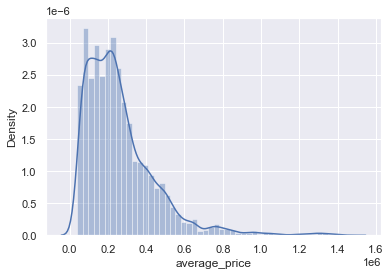

In [19]:
sns.distplot(df_m['average_price'])

In [20]:
# Getting rid of the outliers
q = df_m['average_price'].quantile(0.99)

df_m_1 = df_m[df_m['average_price'] < q]

df_m_1.describe(include='all', datetime_is_numeric=True)

,date,area,average_price,code,houses_sold,borough_flag,year
count,13368,13368,13368.000000,13368,13368.000000,13368.000000,13368.000000
unique,NaN,45,NaN,45,NaN,NaN,NaN
top,NaN,south east,NaN,E09000030,NaN,NaN,NaN
freq,NaN,301,NaN,301,NaN,NaN,NaN
mean,2007-05-13 05:36:31.023339264,NaN,253508.351885,NaN,3931.726371,0.730625,2006.905521
min,1995-01-01 00:00:00,NaN,40722.000000,NaN,2.000000,0.000000,1995.000000
25%,2001-03-01 00:00:00,NaN,131588.500000,NaN,249.000000,0.000000,2001.000000
50%,2007-05-01 00:00:00,NaN,221090.000000,NaN,373.000000,1.000000,2007.000000
75%,2013-08-01 00:00:00,NaN,328892.500000,NaN,3265.250000,1.000000,2013.000000
max,2019-12-01 00:00:00,NaN,966625.000000,NaN,132163.000000,1.000000,2019.000000


C:\Users\Nishant Gupta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_price', ylabel='Density'>

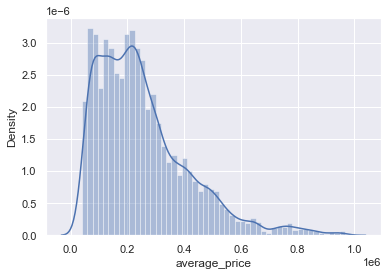

In [21]:
sns.distplot(df_m_1['average_price'])

We split our datasets between boroughs in London and remaining regions of England

In [22]:
lnd = df_m_1[df_m_1['area'].isin(lnd_boroughs)]
eng = df_m_1[df_m_1['area'].isin(eng_regions)]

In [23]:
# Average Price differentiation

lnd_pr = lnd.groupby('date')['average_price'].mean()
eng_pr = eng.groupby('date')['average_price'].mean()

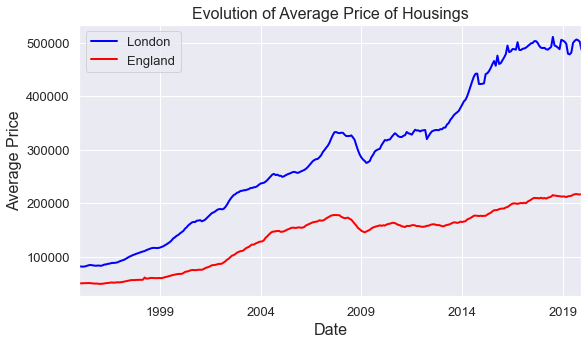

In [24]:
# Plotting Average Price Diff

plt.figure(figsize = (9, 5))

font_size = 16

lnd_pr.plot(y = 'average_price', color = 'blue', lw = 2, label = 'London')
eng_pr.plot(y = 'average_price', color = 'red', lw = 2, label = 'England')

plt.title('Evolution of Average Price of Housings', size = font_size)
plt.ylabel('Average Price', size = font_size)
plt.xlabel('Date', size = font_size)
plt.xticks(size = font_size - 3)
plt.yticks(size = font_size - 3)
plt.legend(fontsize = font_size - 3);

1) The plot depicts that London consistently had higher average price for housings and also followed by a much bigger upward trend of average price.

2) There seems to be a decline near the year 2009 in both areas. This could the Great Recession (2007-2009).

In [25]:
# Average price of each area
# London

lnd_b_prices = lnd.groupby('area')['average_price'].mean()
lnd_top10_pr = lnd_b_prices.sort_values(ascending = False).to_frame()

lnd_top10_pr.head(10)

,average_price
area,
kensington and chelsea,509621.671498
camden,466358.253333
westminster,461853.042802
hammersmith and fulham,442773.376667
city of london,422771.363333
richmond upon thames,381640.966667
islington,364160.283333
wandsworth,341411.026667
barnet,304272.120000


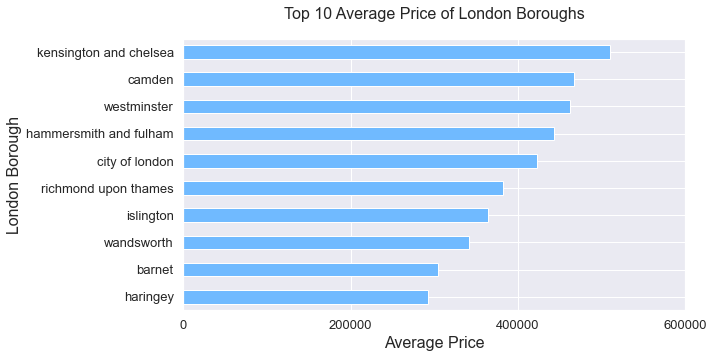

In [26]:
lnd_top10_pr.head(10).sort_values(by = 'average_price', ascending = True).plot(
    kind = 'barh', figsize = (9,5), color = '#70baff', legend = False)

plt.title('Top 10 Average Price of London Boroughs', size = 16, y = 1.05)
plt.ylabel('London Borough', size = 16)
plt.xlabel('Average Price', size = 16)
plt.yticks(size = 16 - 3)
plt.xticks([0, 200_000, 400_000, 600_000], size = 16 - 3);

In [32]:
# England

eng_prices = eng.groupby('area')['average_price'].mean()
eng_top3_pr = eng_prices.sort_values(ascending = False).to_frame()

eng_top3_pr.head(3)

,average_price
area,
south east,195653.013289
east of england,170796.173333
south west,163050.030000


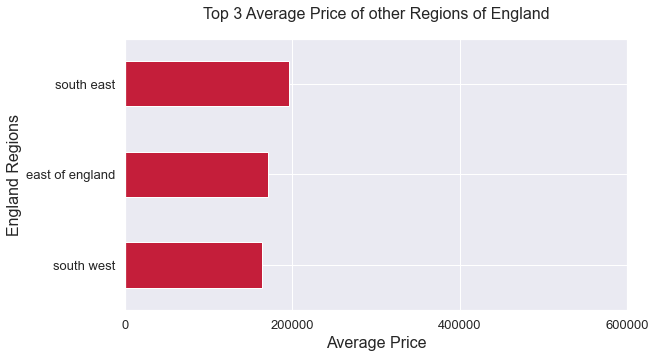

In [34]:
eng_top3_pr.head(3).sort_values(by = 'average_price', ascending = True).plot( 
    kind = 'barh', figsize = (9, 5), color = '#C41E3A', legend = False)

plt.title('Top 3 Average Price of other Regions of England', size = 16, y = 1.05)
plt.ylabel('England Regions', size = 16)
plt.xlabel('Average Price', size = 16)
plt.yticks(size = 16 - 3)
plt.xticks([0, 200_000, 400_000, 600_000], size = 16 - 3);

By both the graphs, we depict that the borough with lowest average price in London is comparable to the most expensive regions in England.

#### House Sold

C:\Users\Nishant Gupta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='houses_sold', ylabel='Density'>

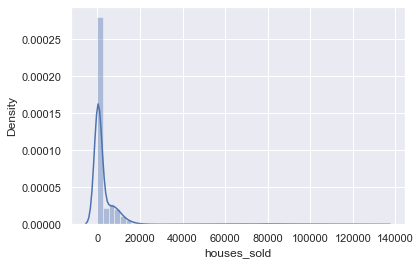

In [49]:
sns.distplot(df_m_1['houses_sold'])

In [52]:
df_m_2 = df_m_1[df_m_1['houses_sold'] < 18000]

C:\Users\Nishant Gupta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='houses_sold', ylabel='Density'>

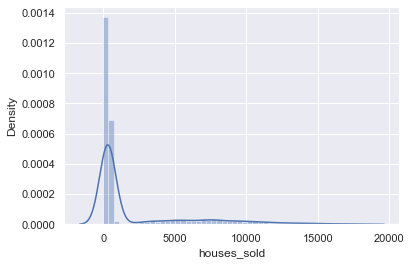

In [53]:
sns.distplot(df_m_2['houses_sold'])

([<matplotlib.axis.YTick at 0x1e5f5093640>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

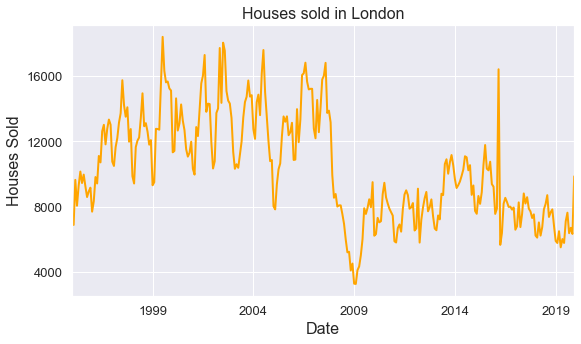

In [54]:
# Plotting houses sold in London

lnd_houses = lnd.groupby('date')['houses_sold'].sum()
lnd_houses.plot(figsize = (9, 5), lw = 2, y = 'houses_sold', color = 'orange')

plt.title('Houses sold in London', size = 16)
plt.xlabel('Date', size = 16)
plt.ylabel('Houses Sold', size = 16)
plt.xticks(size = 16 - 3)
plt.yticks([4000, 8000, 12000, 16000], size = 16 - 3)

1) There was slow and steady growth of houses sold in London until the 'Great Recession' of 2009, where there was significant decrease in the number of houses sold.

2) There seems to be a sudden increase in number of houses sold in year 2015-2016. Google indicates that people started to buy more property before the london government imposed an increased taxation on buying second home.

3) Overall, there is an constant decline in houses sold in London after the recession. Obviously, new tax bill in 2016 being an exception.

In [55]:
# Boroughs with the highest number of sold houses

lnd_b_houses = lnd.groupby('area')['houses_sold'].sum()
lnd_top5_h = lnd_b_houses.sort_values(ascending = False).to_frame()
lnd_top5_h.head(5)

,houses_sold
area,
wandsworth,164419.063545
bromley,149012.709030
croydon,146393.979933
barnet,134094.983278
lambeth,118347.491639


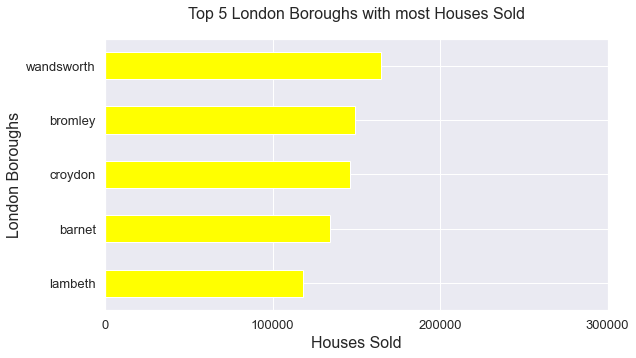

In [56]:
lnd_top5_h.head(5).sort_values(by = 'houses_sold', ascending = True).plot( 
    kind = 'barh', figsize = (9, 5), color = 'Yellow', legend = False)

plt.title('Top 5 London Boroughs with most Houses Sold', size = 16, y = 1.05)
plt.ylabel('London Boroughs', size = 16)
plt.xlabel('Houses Sold', size = 16)
plt.yticks(size = 16 - 3)
plt.xticks([0, 100_000, 200_000, 300_000], size = 16 - 3);

## Conclusion 

1) The average price of housings in London boroughs is higher than of other regions of England. The average price went down during the 'Great Recession' of 2009 and been constantly low.

2) The highest average price regions are Kensighton, Camden, and Westiminister.

3) The number of houses sold dropped during the 2009 recession and there was a sudden spike just before the new tax bill in 2016.

4) The top london boroughs where the most houses were sold are Wandsworth, Bromley, and Croydon.